# EXPERIMENTAL WORK TO INVESTIGATE BIAS IN ML MODEL FOR ECOMMERCE CUSTOMER CHURN PREDICTION

This project is based on Ecommerce customer churn prediction. The dataset for this research was downloaded from Kaggle - an online platform for the community of data scientists. It is Ecommerce Customer Churn Analysis and Prediction Dataset. The dataset belongs to a leading online E-Commerce company. The company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

In the realm of e-commerce, comprehending customer churn holds paramount importance for businesses striving to bolster customer satisfaction and loyalty. Customer churn denotes the frequency at which individuals discontinue their engagement with a company's services, often opting to switch to competitors or halt purchases entirely. Analyzing customer churn yields invaluable insights, enabling businesses to craft targeted strategies aimed at curbing churn rates and fostering enduring customer relationships. This paper explores the significance of understanding customer churn in online retail, its underlying dynamics, and the strategic implications for businesses aiming to enhance customer retention and satisfaction.

In [1]:
#import the packages
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Loading and preview the data set
df = pd.read_csv('ecommerce.csv')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


## DATA STRUCTURE AND STATISTICAL ANALYSIS

The dataset consists of 2 tables with a mix of categorical and numerical features, including gender of customer, and others with originally non-binary target variables indicating a range of features from customer demographics to their purchasing behaviors and engagement metrics.
The main table  contains 20 columns with a total of 5630 records containing information about customers of an e-commerce company.
The statistical analysis gives us brief insight into the data and makes us able to select our models and techniques to conduct our research.

In [3]:
#Preview the dataseat 
print(df.head(10))

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   
5       50006      1     0.0             Computer         1             22.0   
6       50007      1     NaN                Phone         3             11.0   
7       50008      1     NaN                Phone         1              6.0   
8       50009      1    13.0                Phone         3              9.0   
9       50010      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             

In [4]:
#Checking the shape of the dataset
df.shape

(5630, 20)

In [5]:
#descriptive statiscics (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [6]:
#Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
#Checking null values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
#Cheking duplicates
df.duplicated().sum()

0

In [9]:
#Checking data types
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [10]:
#Coun unique numbers in each column
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [11]:
df.drop(columns="CustomerID", inplace=True)

In [12]:
#Show column names
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS AND DATA VISUALISATION

<Axes: xlabel='Gender', ylabel='count'>

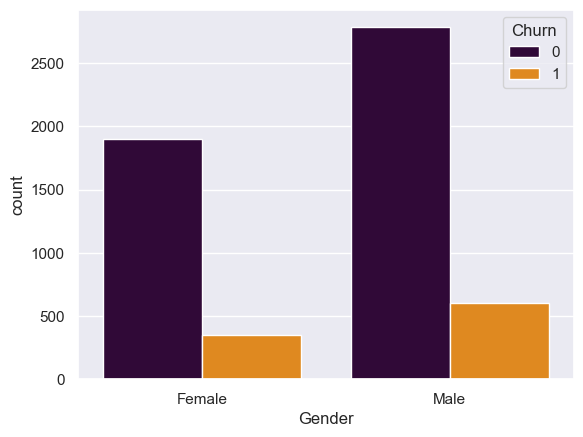

In [13]:
colors = ['#36013F', '#FF8C00']

sns.countplot(x='Gender', hue='Churn', data=df, palette=colors)

<Axes: xlabel='Gender', ylabel='count'>

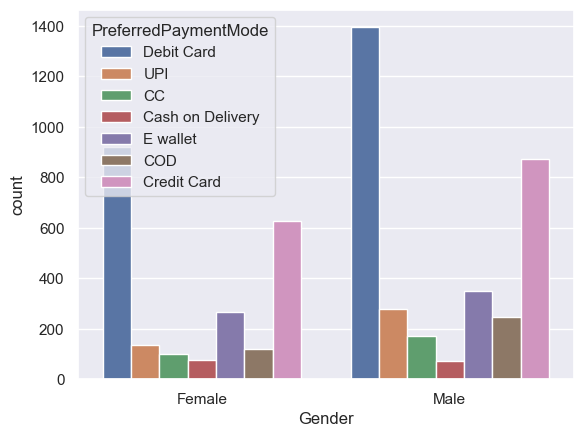

In [14]:
sns.countplot(x='Gender', hue='PreferredPaymentMode', data=df)

<Axes: xlabel='Gender', ylabel='count'>

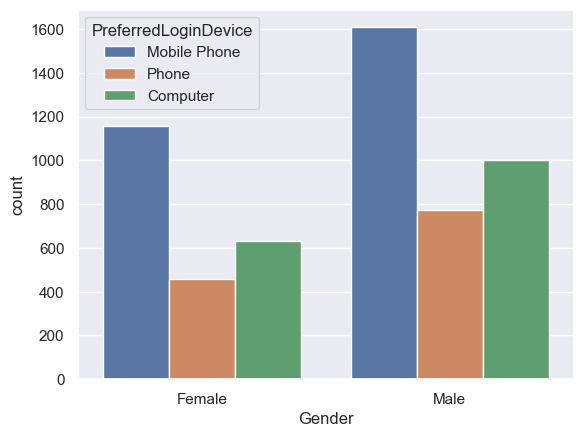

In [15]:
sns.countplot(x='Gender', hue='PreferredLoginDevice', data=df)

<Axes: xlabel='Gender', ylabel='count'>

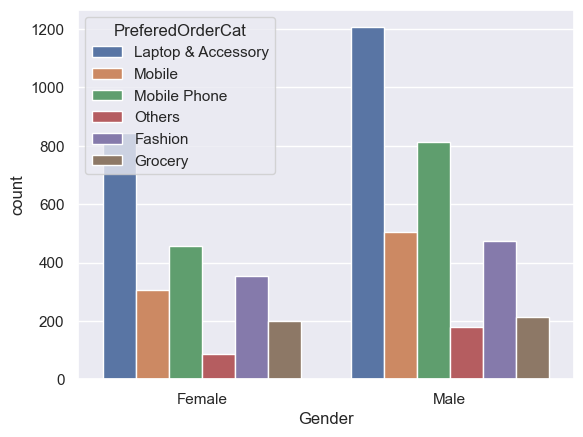

In [16]:
sns.countplot(x='Gender', hue='PreferedOrderCat', data=df)

<Axes: xlabel='Gender', ylabel='count'>

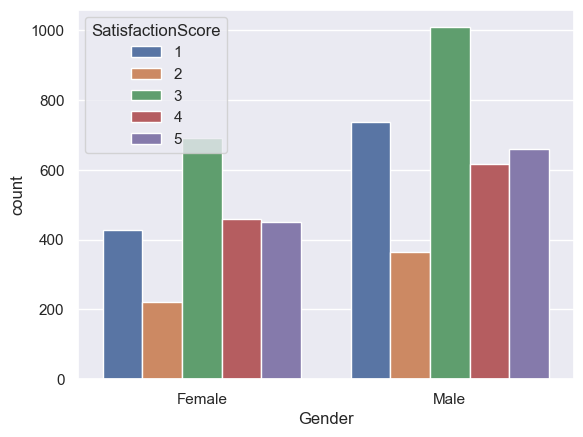

In [17]:
sns.countplot(x='Gender', hue='SatisfactionScore', data=df)

<Axes: xlabel='Gender', ylabel='count'>

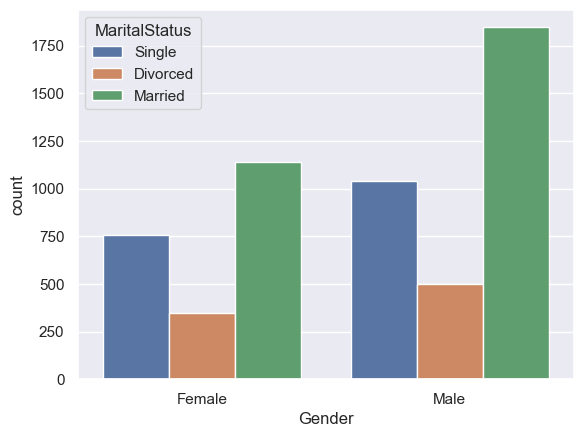

In [18]:
sns.countplot(x='Gender', hue='MaritalStatus', data=df)

Text(0.5, 1.0, 'Distribution of Gender')

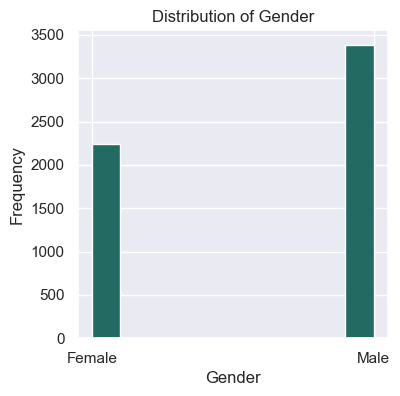

In [19]:
plt.figure(figsize=(4, 4))
plt.hist(df["Gender"],  color='#236A62')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')

In [20]:
#Making two lists based on the number of unique values in each column
count_plot=[]
hist=[]
for i  in df.columns:
    if df[i].nunique() <=20:
        count_plot.append(i)
    else:
        hist.append(i)

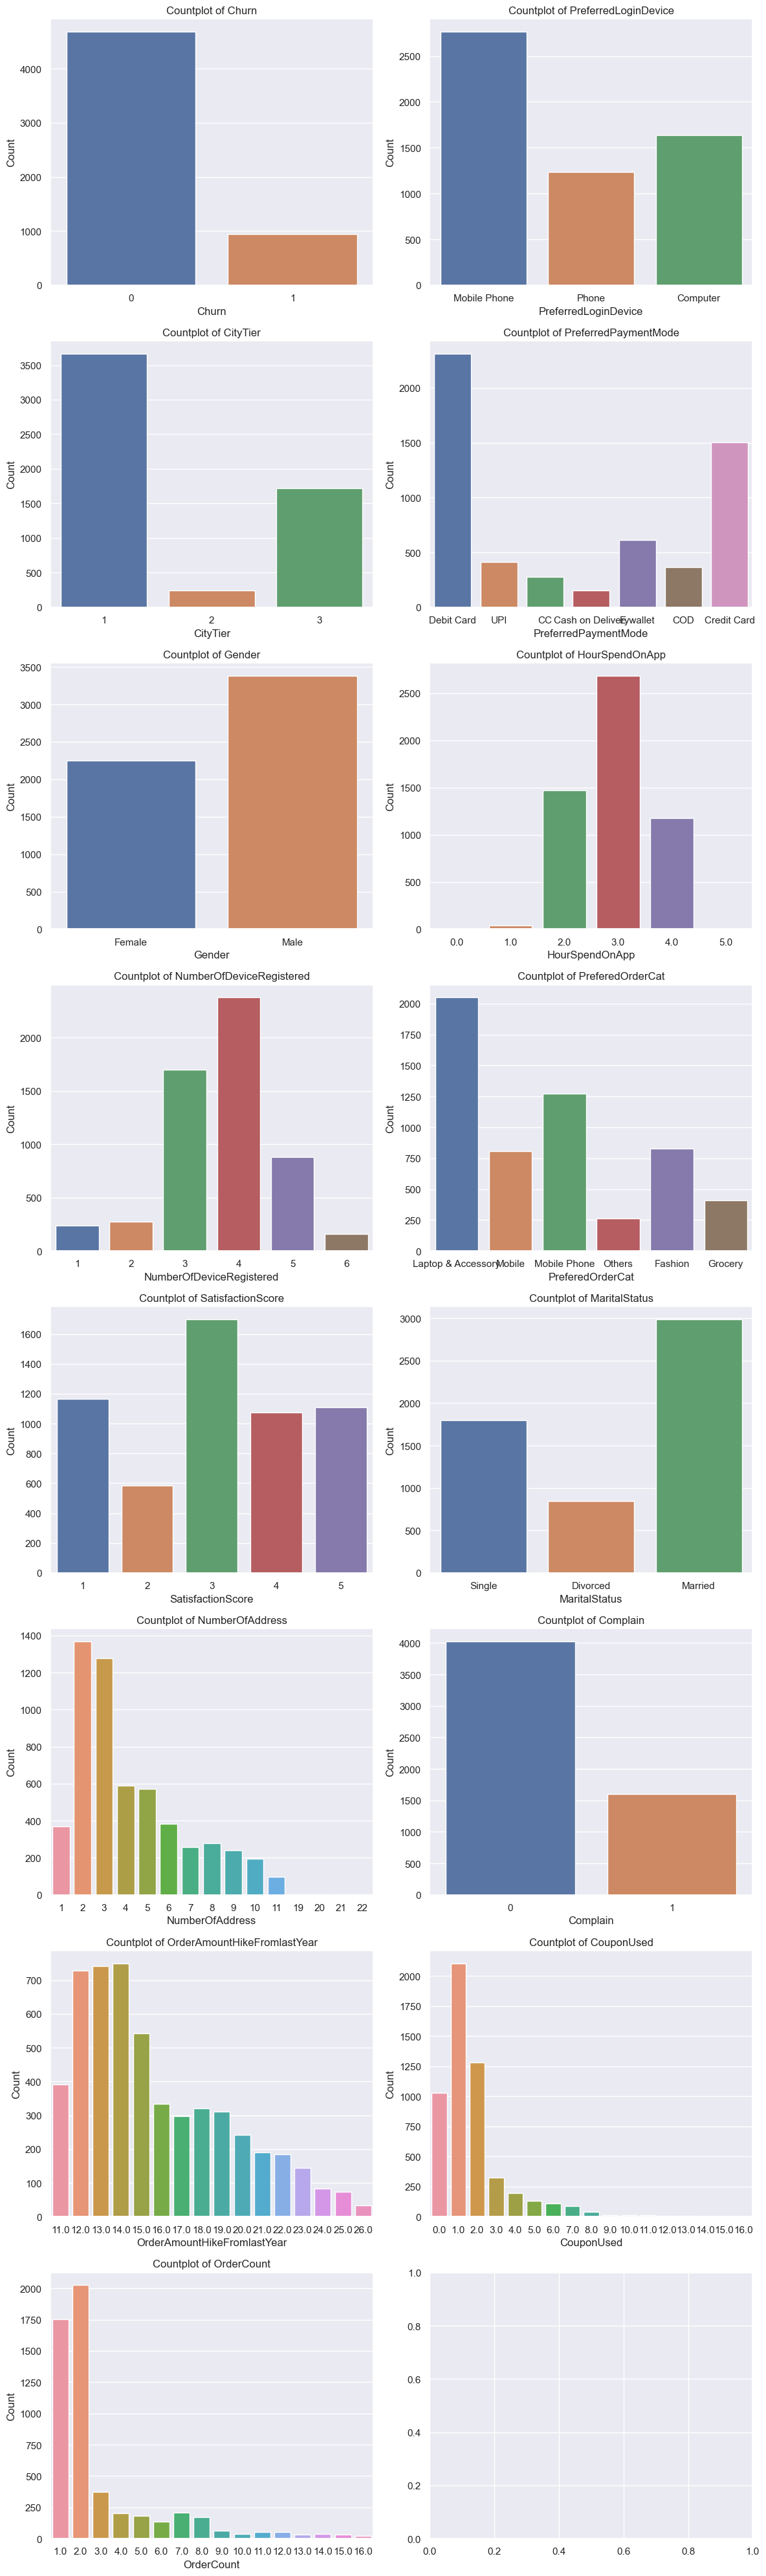

In [21]:
num_rows = (len(count_plot) + 1) // 2

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*5))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = [axes]

# Loop through the column names and create countplots
for i, col in enumerate(count_plot):
    row_index = i // 2
    col_index = i % 2
    sns.countplot(x=col, data=df, ax=axes[row_index][col_index])
    axes[row_index][col_index].set_title(f'Countplot of {col}')
    axes[row_index][col_index].set_xlabel(col)
    axes[row_index][col_index].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()  

<Axes: xlabel='Tenure_bins', ylabel='count'>

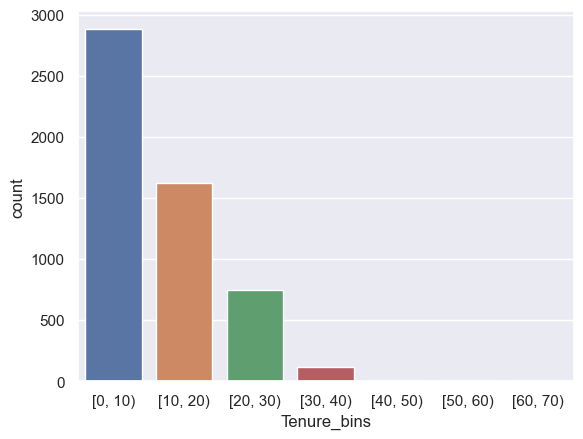

In [22]:
bins = [0,10,20,30,40,50,60,70]  
df['Tenure_bins'] = pd.cut(df['Tenure'], bins=bins, right=False)
sns.countplot(x='Tenure_bins', data=df)

In [23]:
#Defining categorical columns
categorical_columns = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode','Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

In [24]:
# Calculate number of rows for subplots
num_rows = len(categorical_columns) // 2 + (len(categorical_columns) % 2)

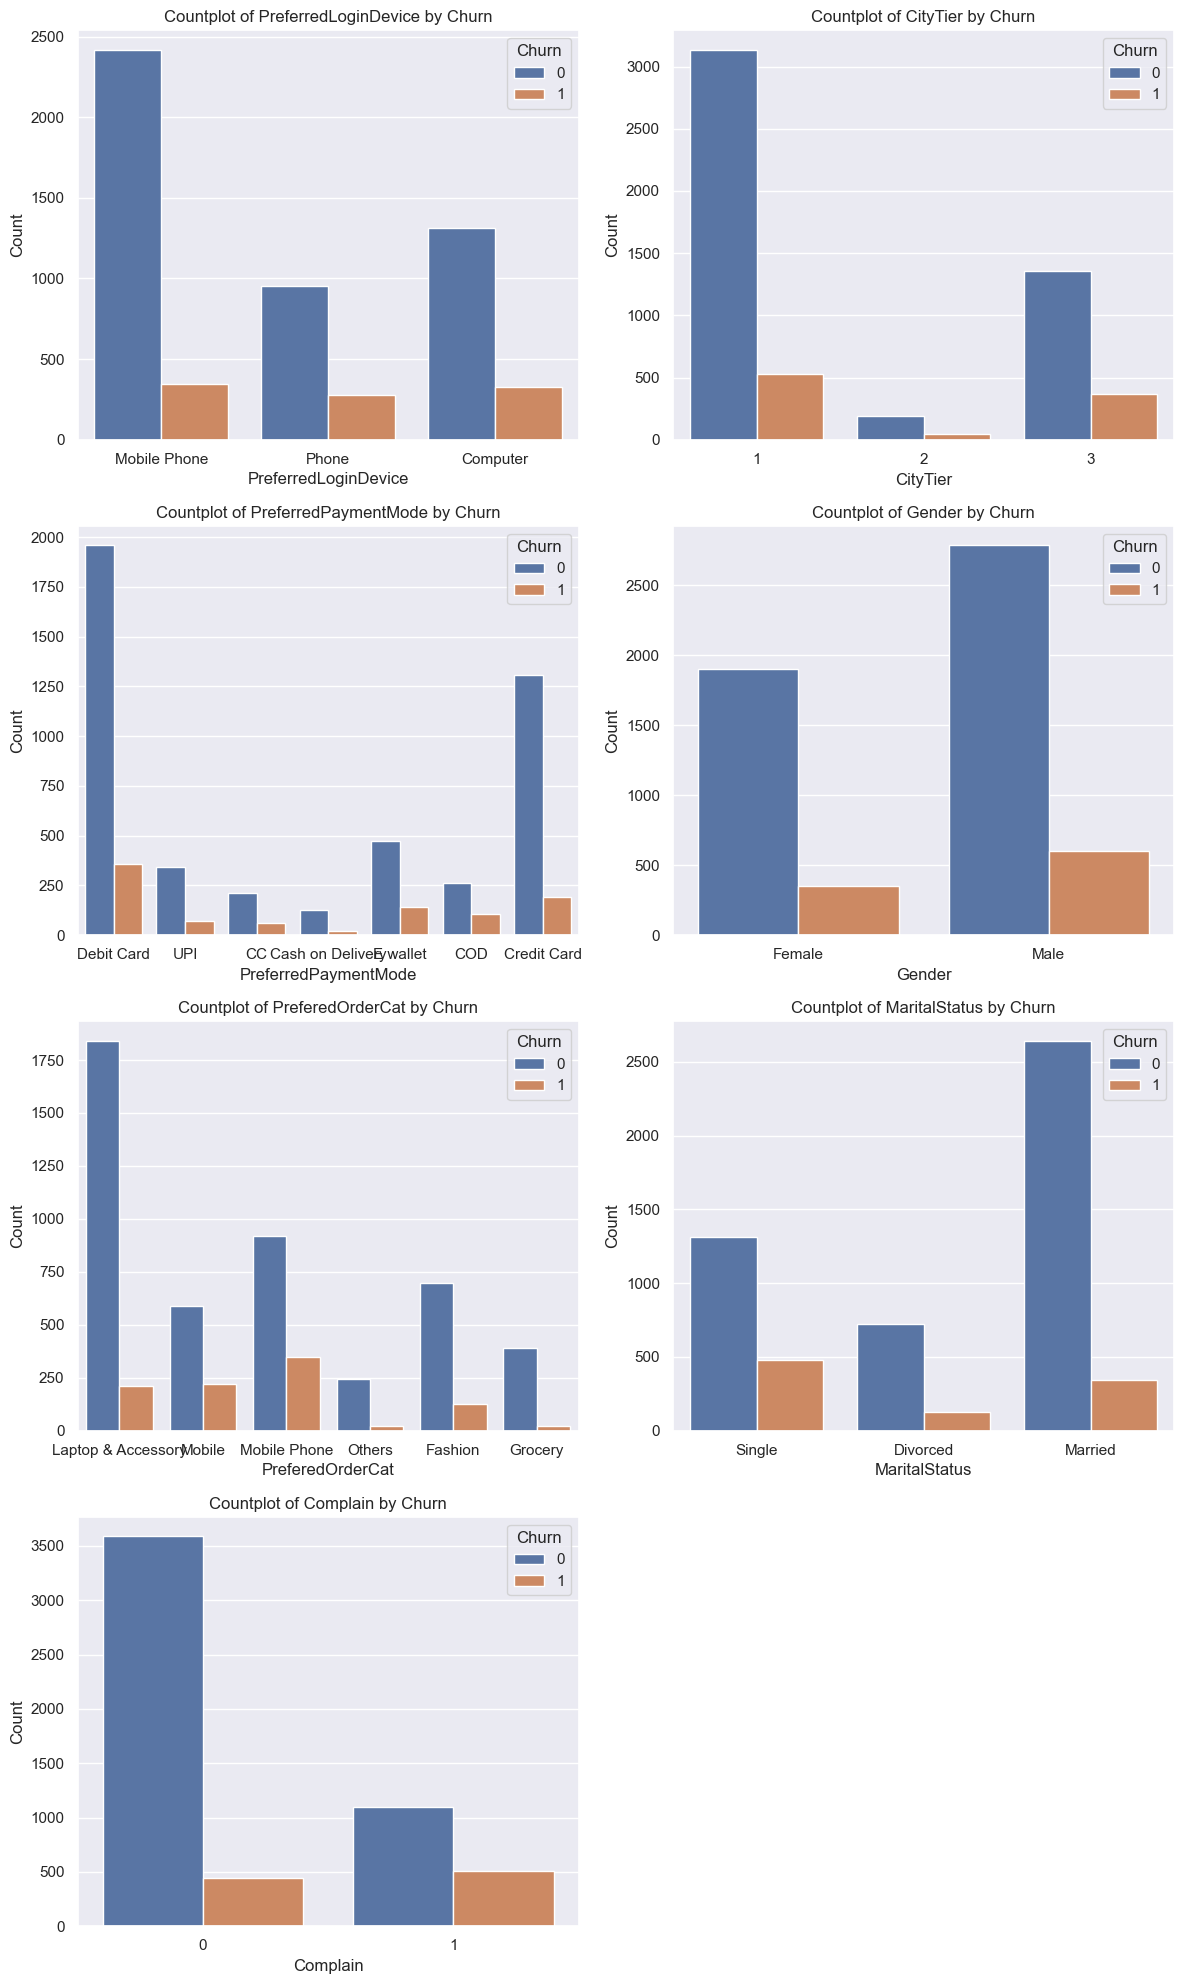

In [25]:
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows*5))
# Flatten the axes array
axes = axes.flatten()
# Loop through categorical columns and create countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue="Churn", data=df, ax=axes[i])
    axes[i].set_title(f'Countplot of {column} by Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any extra subplot if the number of categorical columns is odd
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[len(categorical_columns)])

# Adjust layout
plt.tight_layout()
plt.show()

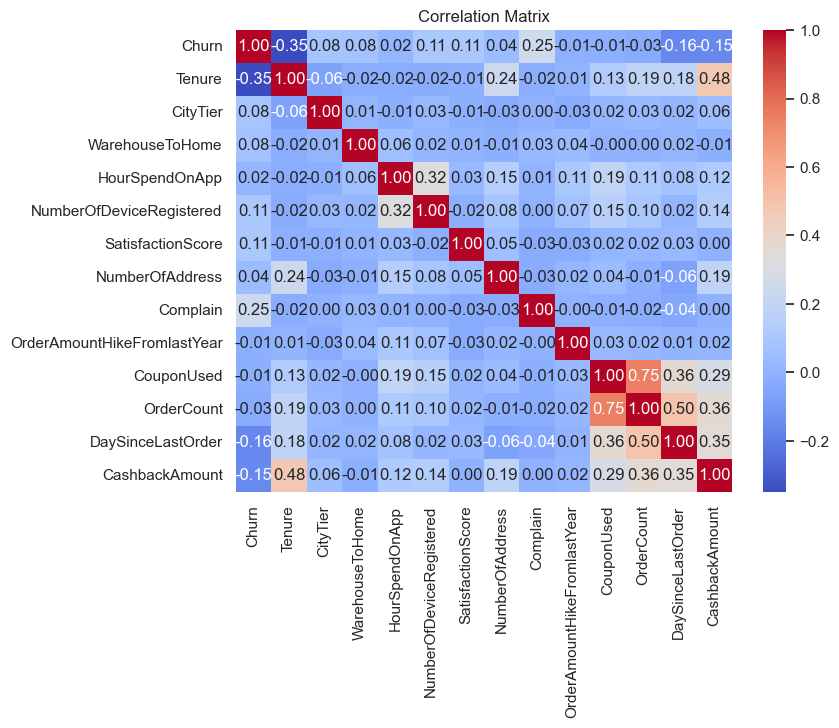

In [26]:
plt.figure(figsize=(8,6))
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
# Display the plot
plt.show()

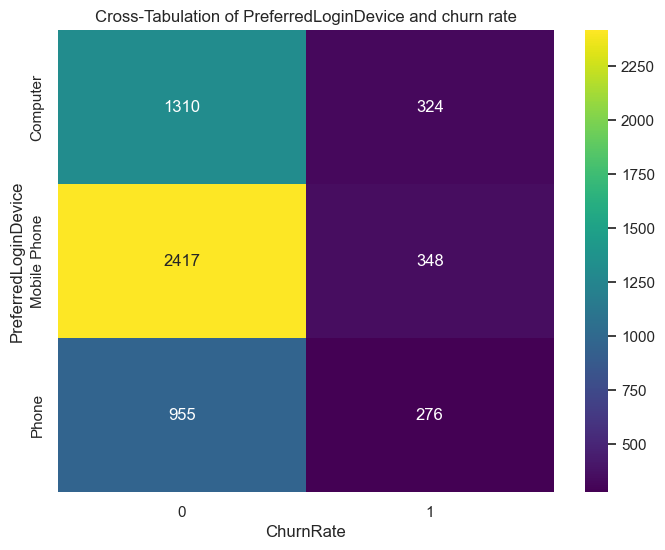

In [27]:
#Checking the  relationship between the Preferd Login Device and Churn Rate?
cross_tab = pd.crosstab(df['PreferredLoginDevice'],df['Churn'])
#chi-Square test of independence to see if there is a significant relationship
from scipy.stats import chi2_contingency
chi2,p,dof,expected= chi2_contingency(cross_tab)
# visualizing the cross-tabulation
plt.figure(figsize=(8,6))
sns.heatmap(cross_tab,annot=True,fmt='d',cmap='viridis')
plt.title('Cross-Tabulation of PreferredLoginDevice and churn rate')
plt.xlabel('ChurnRate')
plt.ylabel('PreferredLoginDevice')
plt.show()

In [28]:
# calculation the percentage of churn and not churn rate for each Login Device
# First create the cross tabluation with normalization
device_churn_percentage= pd.crosstab(df['PreferredLoginDevice'], df['Churn'], normalize='index') * 100
# Convert percentages for easier interpretation
device_churn_percentage=device_churn_percentage.round(2)
device_churn_percentage

Churn,0,1
PreferredLoginDevice,,
Computer,80.17,19.83
Mobile Phone,87.41,12.59
Phone,77.58,22.42


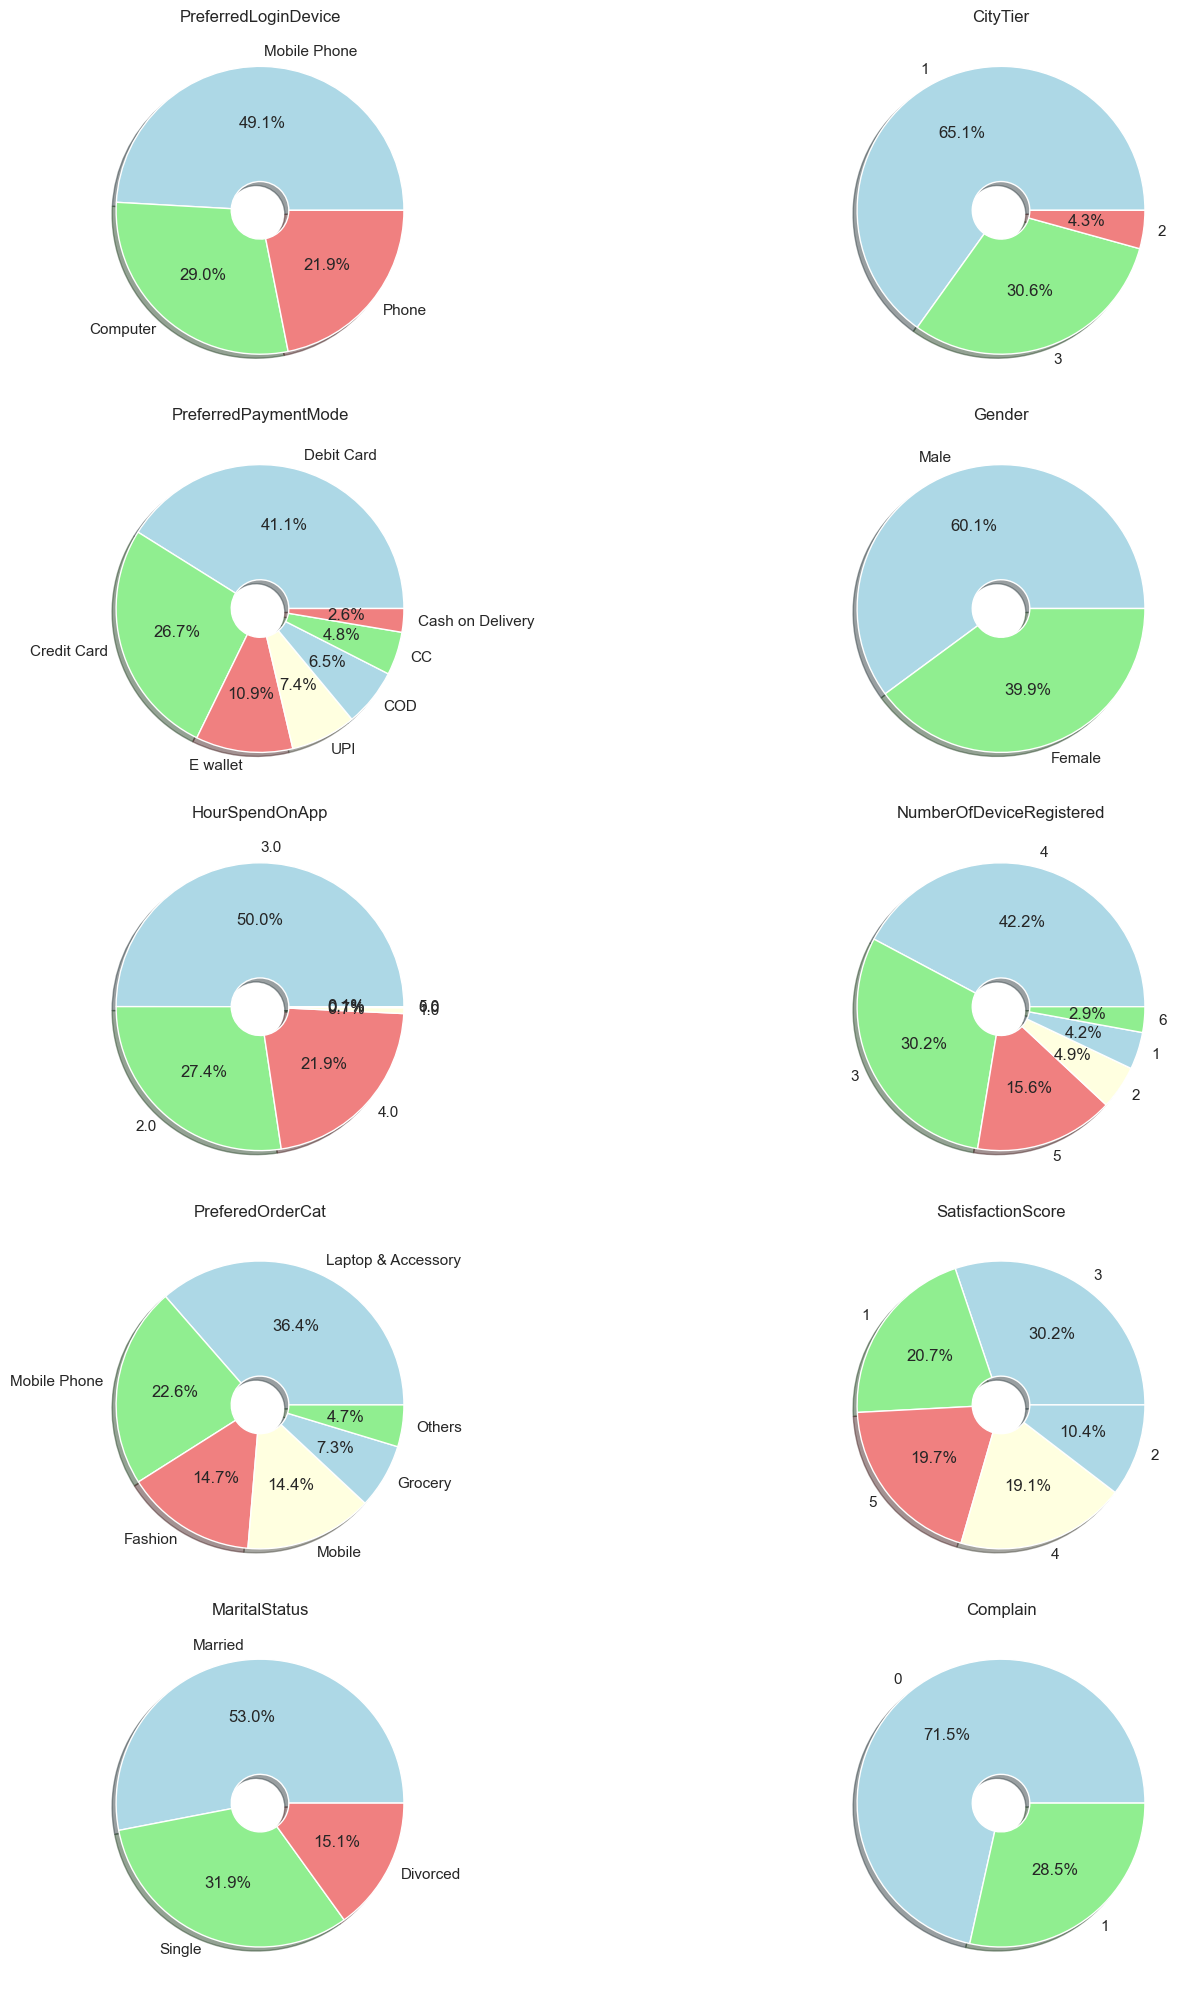

In [29]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in df:
    if df[col].nunique() <= 8 and col != 'Churn' and col != 'Tenure_bins':
        plt.subplot(10,2,plot_num)
        plt.pie(data=df, x=df[col].value_counts().values,labels=df[col].value_counts().index,shadow=True,autopct='%1.1f%%',
               colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'],wedgeprops=dict(width=0.8,edgecolor="w") )
        plt.title(col)
        plot_num += 1
        plt.tight_layout()

<Axes: xlabel='CashbackAmount'>

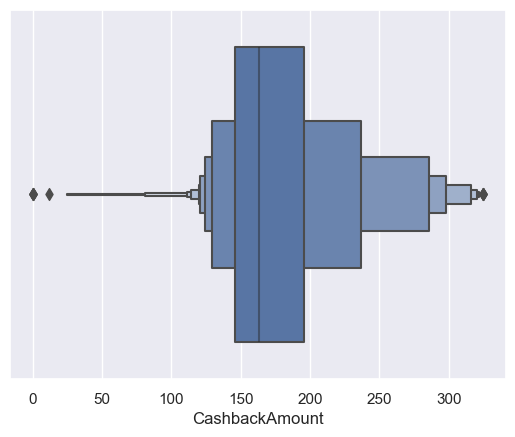

In [30]:
sns.boxenplot(data=df,x="CashbackAmount")

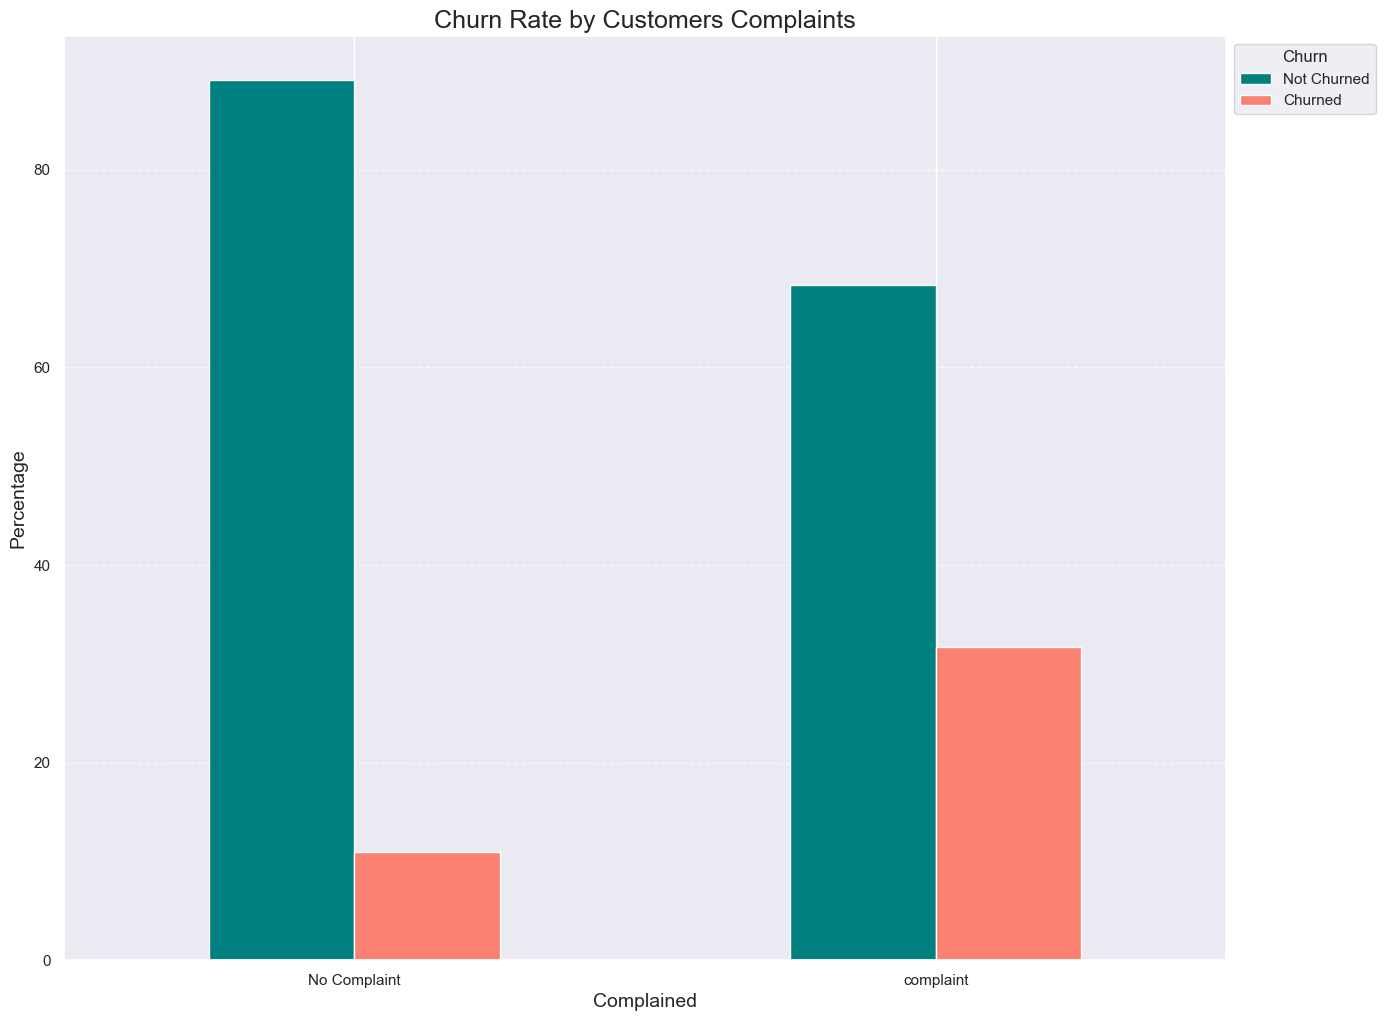

In [31]:
# Analysing the relationship between customers complain and churn rate
complaint_churn_rate=pd.crosstab(df['Complain'],df['Churn'],normalize='index')*100
complaint_churn_rate=complaint_churn_rate.round(2)

# Creating a bar plot to visualize the relationship
plt.figure(figsize=(15,12))
complaint_churn_rate.plot(kind='bar',stacked=False,color=['teal','salmon'],ax=plt.gca())
plt.title('Churn Rate by Customers Complaints',size=18)
plt.xlabel('Complained',size=14)
plt.ylabel('Percentage',size=14)
plt.xticks(ticks=[0,1],labels=['No Complaint','complaint'],rotation=0)
plt.legend(title='Churn', labels=['Not Churned','Churned'],loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

## DATA PRE-PROCESSING

In [32]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_bins
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,"[0.0, 10.0)"
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,NaN
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,NaN
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,"[0.0, 10.0)"
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,"[0.0, 10.0)"


#### Handling Missing Values

In [33]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values)

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
Tenure_bins                    264
dtype: int64


In [34]:
# Deviding columns with mssing values into two groups for different handling of missing values
median_features = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
mode_features = ['HourSpendOnApp']

In [35]:
def imputation (df,
                median_features,
                mode_features,
                median_strategy = 'median',
                mode_strategy = 'most_frequent'
                ):
    imputerMedian = SimpleImputer(missing_values=np.nan, strategy= median_strategy)
    imputerMode = SimpleImputer(missing_values=np.nan, strategy= mode_strategy)
    
    #Fit to the data 
    imputerMedian.fit(df[median_features])
    imputerMode.fit(df[mode_features])
    
    # Transfrom our data
    df[median_features] = imputerMedian.transform(df[median_features])
    df[mode_features] = imputerMode.transform(df[mode_features])
    return df

In [36]:
df = imputation(df, median_features, mode_features)

In [37]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_bins
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,"[0.0, 10.0)"
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,NaN
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,NaN
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,"[0.0, 10.0)"
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,"[0.0, 10.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151,"[10.0, 20.0)"
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225,"[10.0, 20.0)"
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186,"[0.0, 10.0)"
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179,"[20.0, 30.0)"


In [38]:
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values)

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                       0
OrderCount                       0
DaySinceLastOrder                0
CashbackAmount                   0
Tenure_bins                    264
dtype: int64


In [39]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_bins
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,"[0.0, 10.0)"
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121,NaN
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120,NaN
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,"[0.0, 10.0)"
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130,"[0.0, 10.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151,"[10.0, 20.0)"
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225,"[10.0, 20.0)"
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186,"[0.0, 10.0)"
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179,"[20.0, 30.0)"


### One-hot encoding of categorical columns

Converting categorical variables into a numerical representation

In [40]:
#Check data types
data_types = df.dtypes
print(data_types)

Churn                             int64
Tenure                          float64
PreferredLoginDevice             object
CityTier                          int64
WarehouseToHome                 float64
PreferredPaymentMode             object
Gender                           object
HourSpendOnApp                  float64
NumberOfDeviceRegistered          int64
PreferedOrderCat                 object
SatisfactionScore                 int64
MaritalStatus                    object
NumberOfAddress                   int64
Complain                          int64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
OrderCount                      float64
DaySinceLastOrder               float64
CashbackAmount                    int64
Tenure_bins                    category
dtype: object


In [41]:
#Check the unique values of the column 'Churn'
unique_churn = df['Churn'].unique()
print(unique_churn)

[1 0]


In [42]:
# Devide data into features and labels
X = df.drop(columns=["Churn", "Tenure_bins"])
Y = df["Churn"]

In [43]:
# Select categorical columns
cat_col = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
print(cat_col)

Categorical columns:
['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [44]:
# Select only the numerical columns
num_col = X.select_dtypes(include=['int', 'float']).columns.tolist()

print("Numerical columns:")
print(num_col)

Numerical columns:
['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [45]:
# Convert gender column into binary
X["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)

In [46]:
# Initialize LabelEncoder
label_encoders = {}

# Encode categorical columns
for col in cat_col:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Concatenate the encoded columns with the original DataFrame
# Drop the original categorical columns
X_encoded = pd.concat([X.drop(columns=cat_col), X[cat_col]], axis=1)

In [47]:
# Display the encoded DataFrame
print(X_encoded)

      Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        4.0         3              6.0             3.0   
1        9.0         1              8.0             3.0   
2        9.0         1             30.0             2.0   
3        0.0         3             15.0             2.0   
4        0.0         1             12.0             3.0   
...      ...       ...              ...             ...   
5625    10.0         1             30.0             3.0   
5626    13.0         1             13.0             3.0   
5627     1.0         1             11.0             3.0   
5628    23.0         3              9.0             4.0   
5629     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3  

In [48]:
encoded_columns = X_encoded[cat_col]
print(encoded_columns)

      PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                        1                     4       0                 2   
1                        2                     6       1                 3   
2                        2                     4       1                 3   
3                        2                     4       1                 2   
4                        2                     0       1                 3   
...                    ...                   ...     ...               ...   
5625                     0                     3       1                 2   
5626                     1                     3       1                 0   
5627                     1                     4       1                 2   
5628                     0                     3       1                 2   
5629                     1                     3       1                 2   

      MaritalStatus  
0                 2  
1                 2

### Handling Class Imbalance 

As Exploratory Data Analysis has shown the imbalance in the target variable (churn), which may result in a biased model that underperforms on the less represented class. 

In [49]:
# Check the frequency of each unique value in the 'Revenue' column
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

Addressing potential imbalance in the target variable with SMOTE technique.

SMOTE (Synthetic Minority Over-sampling Technique) is a valuable technique for addressing class imbalance because it effectively enhances the representation of the minority class in the dataset, leading to more robust and accurate machine learning models. It creates new instances of the minority class by interpolating between existing minority class instances, thereby increasing the representation of the minority class in the dataset. By generating synthetic samples rather than simply duplicating existing ones, SMOTE helps to avoid overfitting that can occur when the same minority class samples are repeatedly used during training.

In [50]:
# Install the library
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
# Load package
from imblearn.over_sampling import SMOTE

In [52]:
# Apply SMOTE 
smote = SMOTE(sampling_strategy='minority')
X_smote, Y_smote = smote.fit_resample(X_encoded, Y)

# Convert the resampled target variable to a pandas Series
Y_smote = pd.Series(Y_smote)

In [53]:
# Check the number of classes in target variable
Y_smote.value_counts()

1    4682
0    4682
Name: Churn, dtype: int64

In [54]:
missing_values = X_smote.isnull().sum()

# Display the missing values count for each column
print(missing_values)

Tenure                         0
CityTier                       0
WarehouseToHome                0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
SatisfactionScore              0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
PreferredLoginDevice           0
PreferredPaymentMode           0
Gender                         0
PreferedOrderCat               0
MaritalStatus                  0
dtype: int64


We are going to perform ML for both original data and the data after SMOTE to compare the results

### Scale Numerical Data 

In [55]:
#Select only numerical columns
num_data_smote = X_smote[num_col]
num_data_smote

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.000000,3,6.000000,3.0,3,2,9,1,11.000000,1.000000,1.0,5.000000,160
1,9.000000,1,8.000000,3.0,4,3,7,1,15.000000,0.000000,1.0,0.000000,121
2,9.000000,1,30.000000,2.0,4,3,6,1,14.000000,0.000000,1.0,3.000000,120
3,0.000000,3,15.000000,2.0,4,5,8,0,23.000000,0.000000,1.0,3.000000,134
4,0.000000,1,12.000000,3.0,3,5,3,0,11.000000,1.000000,1.0,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,0.000000,3,23.827939,3.0,1,2,7,0,13.781374,0.390687,1.0,3.218626,153
9360,1.000000,1,17.000000,4.0,5,5,8,1,21.000000,2.000000,2.0,1.000000,149
9361,2.592893,1,24.000000,3.0,5,1,8,0,14.061929,1.265482,2.0,3.203553,149
9362,1.000000,1,28.771764,4.0,4,4,3,0,13.278530,1.000000,2.0,2.442941,210


In [56]:
#Select only numerical columns
num_data_original = X_encoded[num_col]
num_data_original

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,160
1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,121
2,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120
3,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134
4,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,1,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,151
5626,13.0,1,13.0,3.0,5,5,6,0,16.0,1.0,2.0,3.0,225
5627,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186
5628,23.0,3,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,179


In [57]:
# Perform scaling of numerical features
scaler = StandardScaler()

# Fit and transform the scaler on the numerical data
numerical_data_scaled = scaler.fit_transform(num_data_smote)

# Convert the scaled numerical data back to a DataFrame
X_scaled = pd.DataFrame(numerical_data_scaled, columns=num_col)

# Display the scaled numerical data
print(X_scaled)

        Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    -0.449589  1.508660        -1.224116        0.070184   
1     0.180374 -0.741414        -0.981566        0.070184   
2     0.180374 -0.741414         1.686481       -1.424012   
3    -0.953559  1.508660        -0.132642       -1.424012   
4    -0.953559 -0.741414        -0.496467        0.070184   
...        ...       ...              ...             ...   
9359 -0.953559  1.508660         0.937965        0.070184   
9360 -0.827567 -0.741414         0.109908        1.564381   
9361 -0.626874 -0.741414         0.958832        0.070184   
9362 -0.827567 -0.741414         1.537526        1.564381   
9363 -0.827567 -0.741414        -0.253917        1.564381   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                    -0.721144          -0.824821         1.909949  1.493345   
1                     0.317747          -0.069159         1.118990  1.493345   
2                     0.317

In [58]:
# Perform scaling of numerical features
scaler = StandardScaler()

# Fit and transform the scaler on the numerical data
numerical_data_scaled = scaler.fit_transform(num_data_original)

# Convert the scaled numerical data back to a DataFrame
X_scaled_original = pd.DataFrame(numerical_data_scaled, columns=num_col)

# Display the scaled numerical data
print(X_scaled_original)

        Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    -0.733989  1.469771        -1.146379        0.092654   
1    -0.135704 -0.715286        -0.906721        0.092654   
2    -0.135704 -0.715286         1.729519       -1.324850   
3    -1.212618  1.469771        -0.067917       -1.324850   
4    -1.212618 -0.715286        -0.427405        0.092654   
...        ...       ...              ...             ...   
5625 -0.016046 -0.715286         1.729519        0.092654   
5626  0.342925 -0.715286        -0.307575        0.092654   
5627 -1.092961 -0.715286        -0.547234        0.092654   
5628  1.539497  1.469771        -0.786892        1.510158   
5629 -0.255361 -0.715286        -0.067917        0.092654   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                    -0.672900          -0.772992         1.852616  1.584290   
1                     0.303750          -0.048392         1.078430  1.584290   
2                     0.303

In [59]:
# Concatenate the scaled numerical data with the encoded categorical data
X_combined = pd.concat([X_scaled, X_encoded], axis=1)
print(X_combined)

        Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    -0.449589  1.508660        -1.224116        0.070184   
1     0.180374 -0.741414        -0.981566        0.070184   
2     0.180374 -0.741414         1.686481       -1.424012   
3    -0.953559  1.508660        -0.132642       -1.424012   
4    -0.953559 -0.741414        -0.496467        0.070184   
...        ...       ...              ...             ...   
9359 -0.953559  1.508660         0.937965        0.070184   
9360 -0.827567 -0.741414         0.109908        1.564381   
9361 -0.626874 -0.741414         0.958832        0.070184   
9362 -0.827567 -0.741414         1.537526        1.564381   
9363 -0.827567 -0.741414        -0.253917        1.564381   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                    -0.721144          -0.824821         1.909949  1.493345   
1                     0.317747          -0.069159         1.118990  1.493345   
2                     0.317

In [60]:
# Concatenate the scaled numerical data with the encoded categorical data
X_combined_original = pd.concat([X_scaled_original, X_encoded], axis=1)
print(X_combined_original)

        Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0    -0.733989  1.469771        -1.146379        0.092654   
1    -0.135704 -0.715286        -0.906721        0.092654   
2    -0.135704 -0.715286         1.729519       -1.324850   
3    -1.212618  1.469771        -0.067917       -1.324850   
4    -1.212618 -0.715286        -0.427405        0.092654   
...        ...       ...              ...             ...   
5625 -0.016046 -0.715286         1.729519        0.092654   
5626  0.342925 -0.715286        -0.307575        0.092654   
5627 -1.092961 -0.715286        -0.547234        0.092654   
5628  1.539497  1.469771        -0.786892        1.510158   
5629 -0.255361 -0.715286        -0.067917        0.092654   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                    -0.672900          -0.772992         1.852616  1.584290   
1                     0.303750          -0.048392         1.078430  1.584290   
2                     0.303

In [61]:
X_scaled

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,-0.449589,1.508660,-1.224116,0.070184,-0.721144,-0.824821,1.909949,1.493345,-1.299769,-0.391688,-0.686210,0.327083,-0.234757
1,0.180374,-0.741414,-0.981566,0.070184,0.317747,-0.069159,1.118990,1.493345,-0.163562,-0.955397,-0.686210,-1.162686,-1.081940
2,0.180374,-0.741414,1.686481,-1.424012,0.317747,-0.069159,0.723511,1.493345,-0.447614,-0.955397,-0.686210,-0.268825,-1.103663
3,-0.953559,1.508660,-0.132642,-1.424012,0.317747,1.442166,1.514470,-0.669638,2.108854,-0.955397,-0.686210,-0.268825,-0.799546
4,-0.953559,-0.741414,-0.496467,0.070184,-0.721144,1.442166,-0.462927,-0.669638,-1.299769,-0.391688,-0.686210,-0.268825,-0.886436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,-0.953559,1.508660,0.937965,0.070184,-2.798926,-0.824821,1.118990,-0.669638,-0.509715,-0.735163,-0.686210,-0.203685,-0.386816
9360,-0.827567,-0.741414,0.109908,1.564381,1.356638,1.442166,1.514470,1.493345,1.540750,0.172022,-0.317738,-0.864732,-0.473706
9361,-0.626874,-0.741414,0.958832,0.070184,1.356638,-1.580483,1.514470,-0.669638,-0.430023,-0.242033,-0.317738,-0.208175,-0.473706
9362,-0.827567,-0.741414,1.537526,1.564381,0.317747,0.686504,-0.462927,-0.669638,-0.652549,-0.391688,-0.317738,-0.434803,0.851375


In [62]:
X_scaled_original

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,-0.733989,1.469771,-1.146379,0.092654,-0.672900,-0.772992,1.852616,1.584290,-1.301849,-0.385940,-0.681423,0.151436,-0.350105
1,-0.135704,-0.715286,-0.906721,0.092654,0.303750,-0.048392,1.078430,1.584290,-0.187872,-0.924305,-0.681423,-1.249003,-1.142957
2,-0.135704,-0.715286,1.729519,-1.324850,0.303750,-0.048392,0.691336,1.584290,-0.466367,-0.924305,-0.681423,-0.408739,-1.163287
3,-1.212618,1.469771,-0.067917,-1.324850,0.303750,1.400807,1.465523,-0.631198,2.040082,-0.924305,-0.681423,-0.408739,-0.878673
4,-1.212618,-0.715286,-0.427405,0.092654,-0.672900,1.400807,-0.469944,-0.631198,-1.301849,-0.385940,-0.681423,-0.408739,-0.959991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.016046,-0.715286,1.729519,0.092654,-1.649551,-1.497592,0.691336,-0.631198,0.647610,-0.385940,-0.334079,-0.128651,-0.533071
5626,0.342925,-0.715286,-0.307575,0.092654,1.280401,1.400807,0.691336,-0.631198,0.090622,-0.385940,-0.334079,-0.408739,0.971315
5627,-1.092961,-0.715286,-0.547234,0.092654,-1.649551,0.676207,-0.469944,1.584290,1.483093,-0.385940,-0.334079,-0.128651,0.178463
5628,1.539497,1.469771,-0.786892,1.510158,1.280401,0.676207,-0.082850,-0.631198,-0.187872,0.152425,-0.334079,1.271788,0.036156


In [63]:
# Identify overlapping columns
overlapping_columns = set(X_scaled_original.columns) & set(X_encoded.columns)

# Drop overlapping columns from X_smote
X_unique = X_encoded.drop(columns=overlapping_columns)

# Concatenate the scaled numerical data with the unique encoded categorical columns
X_combined_original = pd.concat([X_scaled_original, X_unique], axis=1)
X_combined_original

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,-0.733989,1.469771,-1.146379,0.092654,-0.672900,-0.772992,1.852616,1.584290,-1.301849,-0.385940,-0.681423,0.151436,-0.350105,1,4,0,2,2
1,-0.135704,-0.715286,-0.906721,0.092654,0.303750,-0.048392,1.078430,1.584290,-0.187872,-0.924305,-0.681423,-1.249003,-1.142957,2,6,1,3,2
2,-0.135704,-0.715286,1.729519,-1.324850,0.303750,-0.048392,0.691336,1.584290,-0.466367,-0.924305,-0.681423,-0.408739,-1.163287,2,4,1,3,2
3,-1.212618,1.469771,-0.067917,-1.324850,0.303750,1.400807,1.465523,-0.631198,2.040082,-0.924305,-0.681423,-0.408739,-0.878673,2,4,1,2,2
4,-1.212618,-0.715286,-0.427405,0.092654,-0.672900,1.400807,-0.469944,-0.631198,-1.301849,-0.385940,-0.681423,-0.408739,-0.959991,2,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.016046,-0.715286,1.729519,0.092654,-1.649551,-1.497592,0.691336,-0.631198,0.647610,-0.385940,-0.334079,-0.128651,-0.533071,0,3,1,2,1
5626,0.342925,-0.715286,-0.307575,0.092654,1.280401,1.400807,0.691336,-0.631198,0.090622,-0.385940,-0.334079,-0.408739,0.971315,1,3,1,0,1
5627,-1.092961,-0.715286,-0.547234,0.092654,-1.649551,0.676207,-0.469944,1.584290,1.483093,-0.385940,-0.334079,-0.128651,0.178463,1,4,1,2,1
5628,1.539497,1.469771,-0.786892,1.510158,1.280401,0.676207,-0.082850,-0.631198,-0.187872,0.152425,-0.334079,1.271788,0.036156,0,3,1,2,1


In [64]:
# Identify overlapping columns
overlapping_columns = set(X_scaled.columns) & set(X_smote.columns)

# Drop overlapping columns from X_smote
X_smote_unique = X_smote.drop(columns=overlapping_columns)

# Concatenate the scaled numerical data with the unique encoded categorical columns
X_combined = pd.concat([X_scaled, X_smote_unique], axis=1)
X_combined

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,-0.449589,1.508660,-1.224116,0.070184,-0.721144,-0.824821,1.909949,1.493345,-1.299769,-0.391688,-0.686210,0.327083,-0.234757,1,4,0,2,2
1,0.180374,-0.741414,-0.981566,0.070184,0.317747,-0.069159,1.118990,1.493345,-0.163562,-0.955397,-0.686210,-1.162686,-1.081940,2,6,1,3,2
2,0.180374,-0.741414,1.686481,-1.424012,0.317747,-0.069159,0.723511,1.493345,-0.447614,-0.955397,-0.686210,-0.268825,-1.103663,2,4,1,3,2
3,-0.953559,1.508660,-0.132642,-1.424012,0.317747,1.442166,1.514470,-0.669638,2.108854,-0.955397,-0.686210,-0.268825,-0.799546,2,4,1,2,2
4,-0.953559,-0.741414,-0.496467,0.070184,-0.721144,1.442166,-0.462927,-0.669638,-1.299769,-0.391688,-0.686210,-0.268825,-0.886436,2,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,-0.953559,1.508660,0.937965,0.070184,-2.798926,-0.824821,1.118990,-0.669638,-0.509715,-0.735163,-0.686210,-0.203685,-0.386816,0,5,0,2,2
9360,-0.827567,-0.741414,0.109908,1.564381,1.356638,1.442166,1.514470,1.493345,1.540750,0.172022,-0.317738,-0.864732,-0.473706,2,4,0,4,2
9361,-0.626874,-0.741414,0.958832,0.070184,1.356638,-1.580483,1.514470,-0.669638,-0.430023,-0.242033,-0.317738,-0.208175,-0.473706,1,1,1,4,1
9362,-0.827567,-0.741414,1.537526,1.564381,0.317747,0.686504,-0.462927,-0.669638,-0.652549,-0.391688,-0.317738,-0.434803,0.851375,0,2,1,0,1


## Developing and Evaluating Model 

#### Splitting the data 

In [65]:
# Split the data into training and test data (sampled data)
X_train,X_test,Y_train,Y_test=train_test_split(X_combined,Y_smote,test_size=0.2, stratify=Y_smote, random_state=2)
print(X_combined.shape,X_train.shape,X_test.shape)

(9364, 18) (7491, 18) (1873, 18)


In [66]:
# Split the data into training and test data (original data)
X_train_orig,X_test_orig,Y_train_orig,Y_test_orig=train_test_split(X_combined_original,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape,X_train_orig.shape,X_test_orig.shape)

(5630, 18) (4504, 18) (1126, 18)


## Choosing machine learning model 

We will use LazyPredict library for a quick evaluation a range of machine learning models on the dataset. It automates the process of building, training, and evaluating multiple models, providing insights into how different algorithms perform on your data.

In [67]:
# Install the library 
!pip install lazypredict


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
#Import package
from lazypredict.Supervised import LazyClassifier

In [69]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

We will train several machine learning models using the LazyPredict library. The models will be evaluated based on various performance metrics including Accuracy, Balanced Accuracy, ROC AUC, and F1 Score. Additionally, the time taken to train each model will also be provided.

In [70]:
# Evaluate performance of different ML models on the test data
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

print(models)

100%|██████████| 29/29 [00:16<00:00,  1.71it/s]

[LightGBM] [Info] Number of positive: 3746, number of negative: 3745
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2041
[LightGBM] [Info] Number of data points in the train set: 7491, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500067 -> initscore=0.000267
[LightGBM] [Info] Start training from score 0.000267
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.98               0.98     0.98      0.98   
RandomForestClassifier             0.98               0.98     0.98      0.98   
LGBMClassifier                     0.97   

In [71]:
# Evaluate performance of different ML models on the test data
models,predictions = clf.fit(X_train_orig, X_test_orig, Y_train_orig, Y_test_orig)

print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:05<00:00,  5.14it/s]

[LightGBM] [Info] Number of positive: 758, number of negative: 3746
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168295 -> initscore=-1.597760
[LightGBM] [Info] Start training from score -1.597760
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.97               0.95     0.95      0.97   
LabelSpreading                     0.97               0.95     0.95      0.97   
DecisionTreeClassifier             0.96               0.93     0.93      0.96   
XGBClassifier                      0.97               0.93     0.93      0.97   
RandomForestClassifier   

We are going to use well performing model, which was covered in this semester:

Random Forest Classifier: Achieved an accuracy of 0.98 with short training time of 0.94 seconds.

In [72]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [73]:
# Train the classifier
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Make predictions using the testing data
Y_predict = model.predict(X_test)

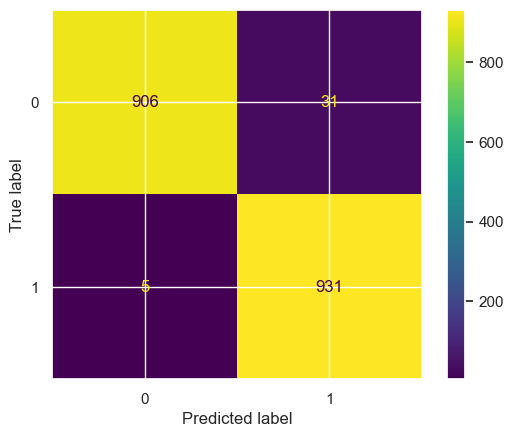

In [75]:
#Display the confusion matrix for your model
cm = metrics.confusion_matrix(Y_test, Y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [76]:
#Calculate the accuracy, precision and recall
accuracy = metrics.accuracy_score(Y_test,Y_predict)
recall = metrics.recall_score(Y_test,Y_predict)
precision = metrics.precision_score(Y_test,Y_predict)
print('Accuracy={0}, Recall={1}, Precision={2}'.format(accuracy,recall,precision))

Accuracy=0.9807794981313401, Recall=0.9946581196581197, Precision=0.9677754677754677


### Making predictions with the original dataset (before SMOTE)

In [78]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(X_train_orig, Y_train_orig)

RandomForestClassifier(random_state=42)

In [79]:
# Make predictions using the testing data
Y_predict_orig = rf_classifier.predict(X_test_orig)

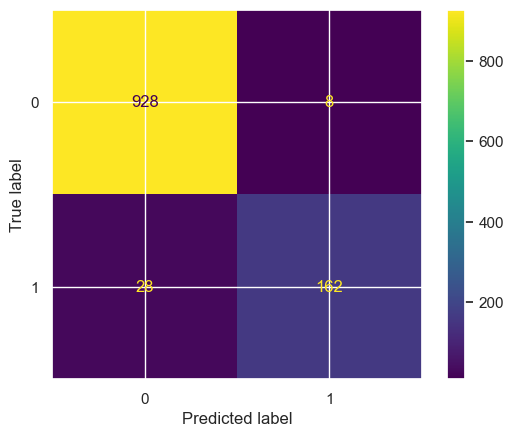

In [80]:
#Display the confusion matrix for your model
cm_orig = metrics.confusion_matrix(Y_test_orig, Y_predict_orig)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_orig)
disp.plot()

In [81]:
#Calculate the accuracy, precision and recall
accuracy_orig = metrics.accuracy_score(Y_test_orig,Y_predict_orig)
recall_orig = metrics.recall_score(Y_test_orig,Y_predict_orig)
precision_orig = metrics.precision_score(Y_test_orig,Y_predict_orig)
print('Accuracy={0}, Recall={1}, Precision={2}'.format(accuracy_orig,recall_orig,precision_orig))

Accuracy=0.9680284191829485, Recall=0.8526315789473684, Precision=0.9529411764705882


### Splitting the True and Predicted Values into Male and Female Groups 

#### Get the indices for “Male” and “Female” from the test data

The code below will check the Gender parameter [Protected Characteristics] and extract the indices where the values are 1.0 [Men] and 0.0 [Women]

In [82]:
PROTECTED = "Gender"
MEN = 1.0 #male
WOMEN = 0.0 #women
gender_dist = X_test[PROTECTED].value_counts()
print(gender_dist)
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

1    1011
0     862
Name: Gender, dtype: int64
[   0    2    4 ... 1869 1871 1872] No of Men = 1011
[   1    3    7   10   11   12   13   16   20   21   22   24   25   30
   31   32   34   38   42   44   47   49   51   56   58   63   66   67
   68   69   70   71   73   74   75   78   79   80   82   83   86   88
   89   91   92   94   95   97  100  102  103  105  106  107  108  110
  111  114  115  117  121  125  126  127  128  132  134  135  138  139
  140  141  142  149  152  154  155  156  157  159  160  162  163  165
  166  169  172  179  181  182  189  190  191  195  196  197  198  199
  201  205  207  210  214  215  218  220  224  229  231  232  237  240
  244  245  246  248  249  251  253  257  258  265  268  269  271  272
  273  274  275  277  279  284  287  292  293  297  299  301  303  304
  305  308  312  313  320  322  323  325  326  329  330  334  336  339
  340  346  347  349  351  352  353  355  356  359  363  365  369  372
  375  377  379  381  382  383  384  386  387  3

In [83]:
#Extract the actual outcomes for the two groups
#We will use the indices to split Y_test into two groups (one for Male and one for Female)
Y_test_m = [Y_test.values[i] for i in men_indices]
Y_test_f = [Y_test.values[i] for i in women_indices]
print(Y_test_m)
print(Y_test_f)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 

In [84]:
#Extract the predicted outcomes for the two groups
Y_predict_m = [Y_predict[i] for i in men_indices]
Y_predict_f = [Y_predict[i] for i in women_indices]
print(Y_predict_m)
print()
print(Y_predict_f)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 

#### Generate a confusion matrix for the two groups and apply appropriate fairness criteria 

### For data after SMOTE

In [85]:
# Extract the actual outcomes for the two groups
Y_test_m = Y_test.iloc[men_indices]
Y_test_f = Y_test.iloc[women_indices]

# Make predictions for men and women separately
Y_predict_m = model.predict(X_test.iloc[men_indices])
Y_predict_f = model.predict(X_test.iloc[women_indices])

# Generate confusion matrices
cm_m = confusion_matrix(Y_test_m, Y_predict_m)
cm_f = confusion_matrix(Y_test_f, Y_predict_f)

print("Confusion Matrix for Men:")
print(cm_m)

print("\nConfusion Matrix for Women:")
print(cm_f)

Confusion Matrix for Men:
[[517  20]
 [  3 471]]

Confusion Matrix for Women:
[[389  11]
 [  2 460]]


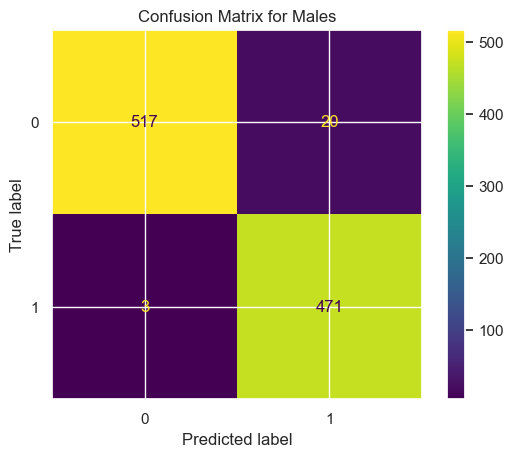

In [86]:
#Display the confusion matrices for male
disp_m = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)

# Plot the confusion matrix for males
fig, ax = plt.subplots()
disp_m.plot(ax=ax)

# Add heading for males
ax.set_title("Confusion Matrix for Males")

# Show the plot
plt.show()

In [88]:
#Calculate the accuracy, precision and recall
accuracy_m = metrics.accuracy_score(Y_test_m,Y_predict_m)
recall_m = metrics.recall_score(Y_test_m,Y_predict_m)
precision_m = metrics.precision_score(Y_test_m,Y_predict_m)
print('Accuracy={0}, Recall={1}, Precision={2}'.format(accuracy_m,recall_m,precision_m))

Accuracy=0.9772502472799208, Recall=0.9936708860759493, Precision=0.9592668024439919


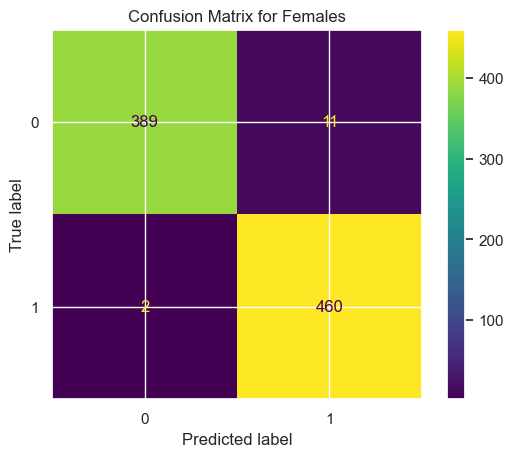

In [89]:
#Display the confusion matrices for male
disp_f = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)

# Plot the confusion matrix for males
fig, ax = plt.subplots()
disp_f.plot(ax=ax)

# Add heading for males
ax.set_title("Confusion Matrix for Females")

# Show the plot
plt.show()

In [91]:
#Calculate the accuracy, precision and recall
accuracy_f = metrics.accuracy_score(Y_test_f,Y_predict_f)
recall_f = metrics.recall_score(Y_test_f,Y_predict_f)
precision_f = metrics.precision_score(Y_test_f,Y_predict_f)
print('Accuracy={0}, Recall={1}, Precision={2}'.format(accuracy_f,recall_f,precision_f))

Accuracy=0.9849187935034803, Recall=0.9956709956709957, Precision=0.9766454352441614


### Fairness criteria for data after SMOTE

Fairness criteria:

Equal accuracy = 0.98

Equal Positive Rate = 0.97

Equality of Opportunity = 0.002

Group fairness (demographic parity) = 0.055 = 5,5%

The model exhibits high accuracy and consistent positive prediction rates across different groups, indicating fairness in terms of accuracy and positive prediction rates.
Equality of Opportunity suggests that the model provides nearly equal opportunities for positive outcomes across different groups.
However, there is a slight bias in the distribution of positive predictions, as indicated by the demographic parity metric.

In [92]:
# Calculate Equal accuracy
Equal_accuracy = (accuracy_m+accuracy_f)/2
Equal_accuracy

0.9810845203917006

In [93]:
# Calculate Equal Positive Rate
Equal_Positive_Rate = (precision_m+precision_f)/2
Equal_Positive_Rate

0.9679561188440766

In [95]:
# Calculate Equality of Opportunity
eop = abs(recall_m-recall_f)
eop

0.002000109595046373

In [96]:
# Calculate Demographic Parity
positive_outcome_m = (21+471)/1014
positive_outcome_f = (9+455)/859
dem_parity = abs(positive_outcome_m - positive_outcome_f)
print('Positive outcome for male:', positive_outcome_m)
print('Positive outcome for female:', positive_outcome_f)
print('Demographic Parity:', dem_parity)

Positive outcome for male: 0.48520710059171596
Positive outcome for female: 0.540162980209546
Demographic Parity: 0.05495587961783005


## REPEAT THE SAME FOR ORIGINAL DATA

In [97]:
PROTECTED = "Gender"
MEN = 1.0 #male
WOMEN = 0.0 #women
gender_dist_orig = X_test_orig[PROTECTED].value_counts()
men_indices_orig = np.where(X_test_orig[PROTECTED] == MEN)[0]
women_indices_orig = np.where(X_test_orig[PROTECTED] == WOMEN)[0]
print(men_indices_orig, "No of Men =", men_indices_orig.size)
print(women_indices_orig, "No of Women =", women_indices_orig.size)

[   0    3    4    5    8    9   12   17   18   19   20   22   23   25
   26   29   31   32   33   34   35   36   37   38   43   45   46   47
   48   49   50   51   52   53   54   55   56   57   58   59   61   62
   63   64   65   69   70   77   78   79   80   82   84   85   87   90
   96   97   99  100  101  102  104  107  109  112  113  115  117  118
  119  120  121  122  124  126  128  130  133  134  135  136  137  138
  139  140  143  144  145  146  147  148  150  151  153  155  158  160
  161  164  167  169  177  181  182  186  189  190  191  193  195  197
  198  199  200  202  203  205  207  209  211  212  214  215  216  218
  220  221  224  226  228  233  235  236  238  239  240  242  243  245
  246  247  248  250  253  256  257  258  261  263  265  266  267  269
  272  273  274  275  278  279  280  281  282  285  286  288  291  292
  293  294  295  298  299  301  302  304  305  306  307  309  313  315
  317  318  320  321  322  323  325  328  329  330  331  332  334  335
  337 

In [98]:
#Extract the actual and predicted outcomes for the two groups
#We will use the indices to split Y_test into two groups (one for Male and one for Female)
Y_test_m_orig = [Y_test_orig.values[i] for i in men_indices_orig]
Y_test_f_orig = [Y_test_orig.values[i] for i in women_indices_orig]

In [99]:
#Compute the confusion matrices(cm_m and cm_f) for the two groups
# Predict labels for men and women
Y_pred_m_orig = rf_classifier.predict(X_test_orig.iloc[men_indices_orig])
Y_pred_f_orig = rf_classifier.predict(X_test_orig.iloc[women_indices_orig])

# Compute confusion matrices
cm_m_orig = confusion_matrix(Y_test_m_orig, Y_pred_m_orig)
cm_f_orig = confusion_matrix(Y_test_f_orig, Y_pred_f_orig)

print("Confusion Matrix for Men:")
print(cm_m_orig)

print("Confusion Matrix for Women:")
print(cm_f_orig)

Confusion Matrix for Men:
[[531   5]
 [ 20  97]]
Confusion Matrix for Women:
[[397   3]
 [  8  65]]


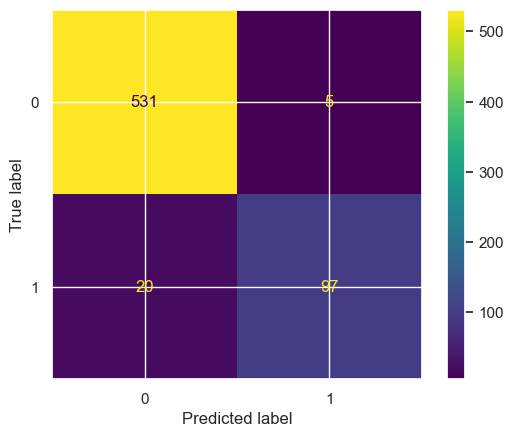

In [100]:
#Display the confusion matrices for male
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m_orig)
disp.plot()

In [101]:
#Calculate the accuracy, precision and recall
accuracy_m_orig = metrics.accuracy_score(Y_test_m_orig,Y_pred_m_orig)
recall_m_orig = metrics.recall_score(Y_test_m_orig,Y_pred_m_orig)
precision_m_orig = metrics.precision_score(Y_test_m_orig,Y_pred_m_orig)
print('Accuracy={0}, Recall={1}, Precision={2}'.format(accuracy_m_orig,recall_m_orig,precision_m_orig))

Accuracy=0.9617151607963247, Recall=0.8290598290598291, Precision=0.9509803921568627


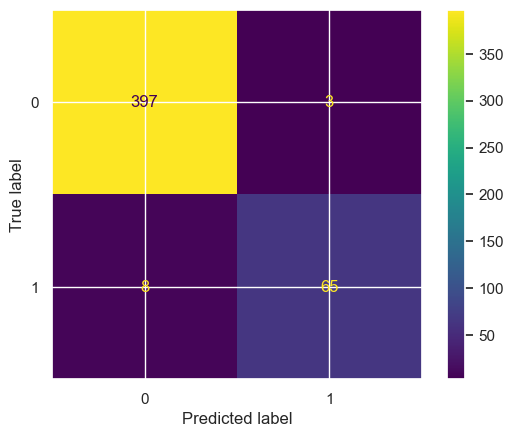

In [102]:
#Display the confusion matrices for male
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f_orig)
disp.plot()

In [103]:
#Calculate the accuracy, precision and recall
accuracy_f_orig = metrics.accuracy_score(Y_test_f_orig,Y_pred_f_orig)
recall_f_orig = metrics.recall_score(Y_test_f_orig,Y_pred_f_orig)
precision_f_orig = metrics.precision_score(Y_test_f_orig,Y_pred_f_orig)
print('Accuracy={0}, Recall={1}, Precision={2}'.format(accuracy_f_orig,recall_f_orig,precision_f_orig))

Accuracy=0.9767441860465116, Recall=0.8904109589041096, Precision=0.9558823529411765


### Fairness criteria for data before SMOTE

Fairness criteria:

Equal accuracy = 0.97

Equal Positive Rate = 0.95

Equality of Opportunity = 0.06

The model exhibits high accuracy and consistent positive prediction rates across different groups, indicating fairness in terms of accuracy and positive prediction rates.
However, there is a small disparity in the TPRs between different groups, suggesting slight bias in providing equal opportunities for positive outcomes.

In [104]:
# Calculate Equal accuracy
Equal_accuracy2 = (accuracy_m_orig+accuracy_f_orig)/2
Equal_accuracy2

0.9692296734214181

In [105]:
# Calculate Equal Positive Rate
Equal_Positive_Rate2 = (precision_m_orig+precision_f_orig)/2
Equal_Positive_Rate2 

0.9534313725490196

In [106]:
# Calculate Equality of Opportunity
eop2 = abs(recall_m_orig-recall_f_orig)
eop2

0.06135112984428048

## Ad-hoc explanation for RandomForestClassifier model (LIME)

In [107]:
# Save the model into a file using the joblib package
# Load packages
from joblib import dump, load

In [108]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Use predict_proba to get the probabilities
class_probabilities = model.predict_proba(X_test)

In [109]:
#Dump the model into a joblib file
dump(model,'RFC.joblib')

['RFC.joblib']

In [110]:
#Load the model
model_from_file = load('RFC.joblib')

In [111]:
#Install the LIME package
!pip install lime


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
# Import LIME package
import lime.lime_tabular

In [113]:
#Create an explainer using LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,verbose=True, mode='classification')

In [114]:
#Create an explanation for a prediction
explanation = explainer.explain_instance(X_test.iloc[0], model.predict_proba)

Intercept 0.5433091629218304
Prediction_local [0.57654663]
Right: 0.06


In [115]:
#Show the results of the explanation in the notebook
explanation.show_in_notebook(show_table=True)

In [116]:
# Extract the coefficients as a list
explanation.as_list()

[('-0.81 < HourSpendOnApp <= 0.07', 0.05089865016663207),
 ('NumberOfAddress <= -0.86', -0.035566355383584915),
 ('-0.39 < CouponUsed <= 0.17', 0.031972736524962346),
 ('0.00 < Gender <= 1.00', -0.028065455148135385),
 ('PreferredLoginDevice <= 0.00', 0.02327188108041426),
 ('-0.73 < OrderAmountHikeFromlastYear <= -0.16', 0.022311173918245285),
 ('-0.74 < CityTier <= 1.51', -0.017467004504319573),
 ('-0.27 < DaySinceLastOrder <= 0.90', -0.013648438454633122),
 ('-0.69 < OrderCount <= -0.32', -0.011566149018224522),
 ('PreferedOrderCat <= 2.00', 0.011096423436671927)]

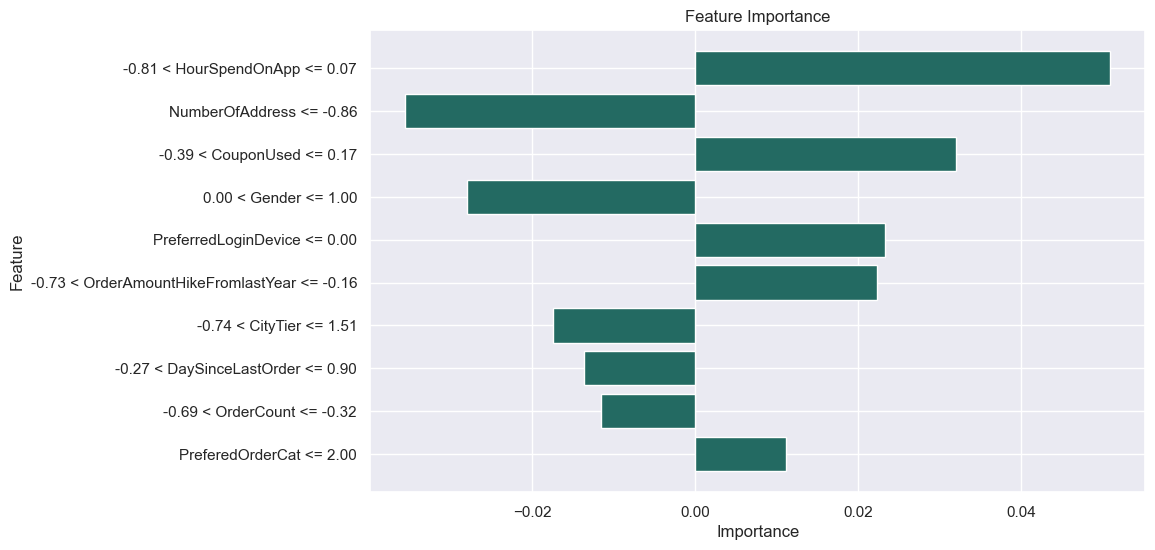

In [117]:
# Get feature names and importances
features, importances = zip(*explanation.as_list())

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='#236A62')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()